# Types

## int, bool, float, str

**Is float/bool is subclass of int?**


In [9]:
print(issubclass(bool, int))
print(issubclass(int, float))

True
False


**`isinstance(bool, int)`vs `type(bool) is int`**

In [26]:
# The following line check whether bool is an instance of int
print(isinstance(bool, int))

# The following line on the other hand checks whether 
# type of bool is int
print(type(bool) is int)

False
False


As we can see, both of these lines print `False`. That's because `bool` is actually an instance of a class `type`. And the instances of class `int` are: `True`, `False`, 5, -43, etc.

`type` on the other hand returns to as exact `type` of the object in the parameter. In this case, `type` of `bool` is `type`, which is not equal to `int`. Even if we are to input `False`, the `type` of `False` is `bool`, which is not equal to `int`. That's a notable example, sice `isinstance(False, int)` will give us `True`, since `False` is actually can be represented as logical 0, which is an instance of the class `int`.

**Dimensions of types**

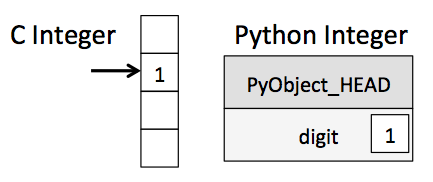

A single integer in Python 3.4 actually contains four pieces:

- `ob_refcnt`, a reference count that helps Python silently handle memory allocation and deallocation
- `ob_type`, which encodes the type of the variable
- `ob_size`, which specifies the size of the following data members
- `ob_digit`, which contains the actual integer value that we expect the Python variable to represent.




\* *(from https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)*

**Here are some sizes (in bytes) of some instances of types** (python 3.9.12)

(Important) These sizes heavily depend on version of python

In [55]:
import sys

def f(): return

types = [int(0), float(0), str(), list(), tuple(), dict(), set(), frozenset(), None, ..., object(), lambda: None, f, Exception()]
names = ["int", "float", "str", "list", "tuple", "dict", "set", "frozenset", "None", "Ellipsis", "Object", "Lambda", "Function-ref", "Exception"]

sizes = list(map(lambda x: sys.getsizeof(x), types))

for t, s in zip(names, sizes): print(f"Size of {t} is: {s}")


Size of int is: 24
Size of float is: 24
Size of str is: 51
Size of list is: 56
Size of tuple is: 40
Size of dict is: 232
Size of set is: 216
Size of frozenset is: 216
Size of None is: 16
Size of Ellipsis is: 16
Size of Object is: 16
Size of Lambda is: 136
Size of Function-ref is: 136
Size of Exception is: 80


#### str concatenation is bad?

# Bytes, Bytearrays

Python 3's `bytes` and `bytearray` classes both hold arrays of bytes, where each byte can take on a value between 0 and 255. The primary difference is that a `bytes` object is immutable, meaning that once created, you cannot modify its elements. By contrast, a `bytearray` object allows you to modify its elements.

Both `bytes` and `bytearray` provide functions to encode and decode strings

\* *(source: https://stackoverflow.com/questions/62903377/python3-bytes-vs-bytearray-and-converting-to-and-from-strings)*

In [80]:
a = "fqwjefwfqpeuewfqfwefqwefwqefwqefwqhfwpuhefqo]"
b = a.encode("utf-8")  # convert str to bytes
c = b.decode()  # convert bytes to str

print(sys.getsizeof(bytes("wfe", "utf-8")))
print(sys.getsizeof("wfe"))

# as we can see from the output, one advantage of bytes
# is that its size is smaller than of str

36
52


## complex, Decimal, NoneType

#### complex

In [89]:
x = complex(3,5)
type(x) is complex  # True
print(f"x is {x}")

x is (3+5j)


#### Decimal

Use decimals when precision matters, such as with financial calculations.  
Decimals can suffer from their own precision issues, but generally, decimals are more precise than floats. The performance difference between float and decimal, with Python 3, is not outlandish, and in my experience, the precision benefits of a decimal outweigh the performance benefits of a float.

In [96]:
from decimal import Decimal

print(f"{Decimal('0.1'):.18f}")

Decimal('.1') + Decimal('.1') + Decimal('.1') == Decimal('.3')

0.100000000000000000


True

In [98]:
.1 + .1 + .1 == .3

False

You see my point? `float` has major precision issues, although performance-wise they might be better

However, `Decimal` has also issues with precision, mainly when we are dealing with fractions:

In [107]:
print(Decimal('1') / Decimal('3') * Decimal('3') == Decimal('1'))

Decimal('1') / Decimal('3') * Decimal('3')

False


Decimal('0.9999999999999999999999999999')

#### NoneType

`NoneType` is the type for the `None` object, which is an object that indicates no value. `None` is the return value of functions that "don't return anything". It is also a common default return value for functions that search for something and may or may not find it; for example, it's returned by `re.search` when the `regex` doesn't match, or `dict.get` when the key has no entry in the dict. You cannot add `None` to strings or other objects.

In [119]:
type(None)

NoneType

# dict, defaultdic

**Q:** Why is the dict data structure necessary? 

**A:** It is necessary when we want to associate values with keys, and then look up this values by their keys efficiently

**Q:** Name the main methods for working with dict structure?  

**A:** 

| Function Name | Descriptions |
| --- | --- |
| clear() | Removes all items from the dictionary |
| copy() | Returns a shallow copy of the dictionary |
| fromkeys() | Creates a dictionary from the given sequence |
| get() | Returns the value for the given key |
| items() | Return the list with all dictionary keys with values |
| keys() | Returns a view object that displays a list of all the keys in the dictionary in order of insertion |
| pop() | Returns and removes the element with the given key |
| popitem() | Returns and removes the key-value pair from the dictionary |
| setdefault() | Returns the value of a key if the key is in the dictionary else inserts the key with a value to the dictionary |
| values() | Returns a list of all the values available in a given dictionary |
| update() | Updates the dictionary with the elements from another dictionary  |

**Q:** Is it possible to make any object in Python the key of a dict data structure?

**A:** Only hashable objects

**Q:** Does the insertion order store the dict data structure?  **A:** Yes.


**Q:** What keys will be in the dict as a result of the command d = {1: ""a"", True: ""b"", 1.0: ""c""}?  **A:** c


In [126]:
d = {1: 'a', True: 'b', 1.0: 'c'}
d

{1: 'c'}

#### defaultdict

dict subclass that calls a factory function to supply missing values.

`class collections.defaultdict(default_factory=None, /[, ...])`

Return a new dictionary-like object. defaultdict is a subclass of the built-in dict class. It overrides one method and adds one writable instance variable. The remaining functionality is the same as for the dict class and is not documented here.

In [145]:
from collections import defaultdict

isinstance(defaultdict(), dict)


True